# Image Analysing 

Using python OpenCV and matplotlib

In [4]:
import pandas
import numpy

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

# Importing image to read

In [6]:
im_f = glob('/kaggle/input/my-photos/Dummy.jpg')

In [9]:
im_mp = plt.imread(im_f[0])
im_cv = cv2.imread(im_f[0])
im_mp.shape, im_cv.shape

((528, 528, 3), (528, 528, 3))

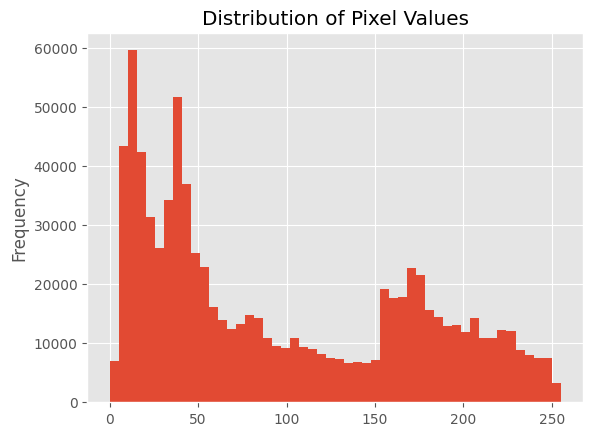

In [13]:
pandas.Series(im_cv.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

# Image displaying

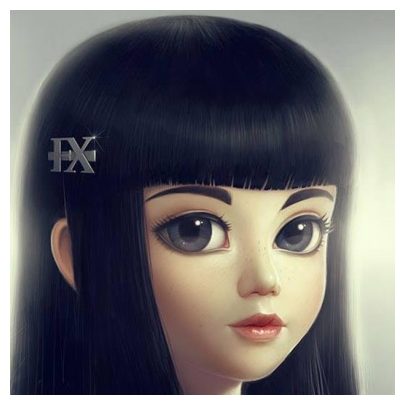

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im_mp)
ax.axis('off')
plt.show()

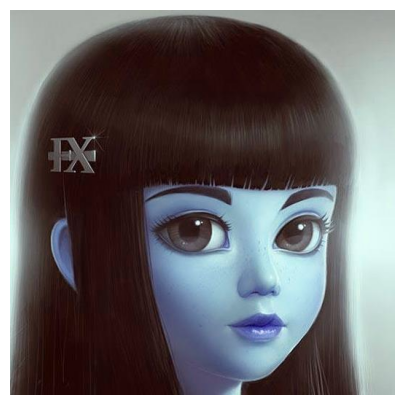

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im_cv)
ax.axis('off')
plt.show()

## Display RGB Channels of above image

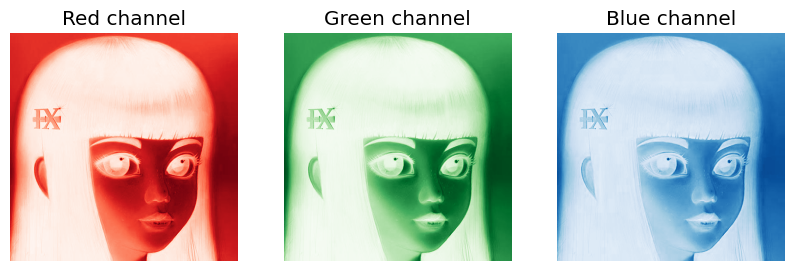

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(im_mp[:,:,0], cmap='Reds')
axs[1].imshow(im_mp[:,:,1], cmap='Greens')
axs[2].imshow(im_mp[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

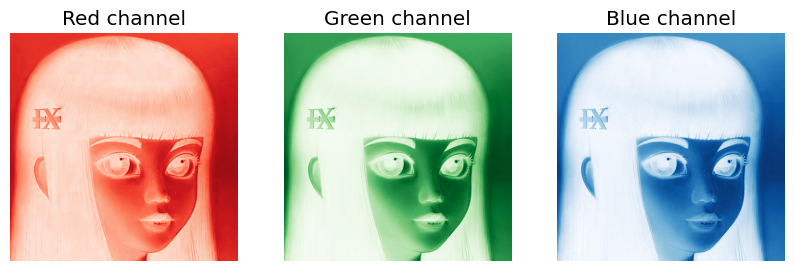

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(im_cv[:,:,0], cmap='Reds')
axs[1].imshow(im_cv[:,:,1], cmap='Greens')
axs[2].imshow(im_cv[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

# Matplotlib vs cv2 Numpy Arrays
- cv2 reads in channels as BGR
- matplotlib reads in channels as RGB

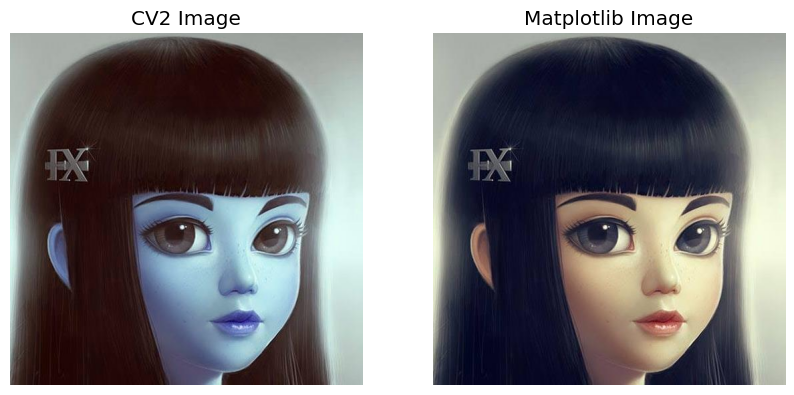

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(im_cv)
axs[1].imshow(im_mp)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

## Converting from BGR to RGB

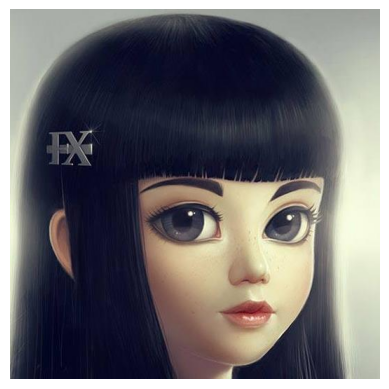

In [33]:
im_cv_rgb = cv2.cvtColor(im_cv, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(im_cv_rgb)
ax.axis('off')
plt.show()

# Image Modifying 

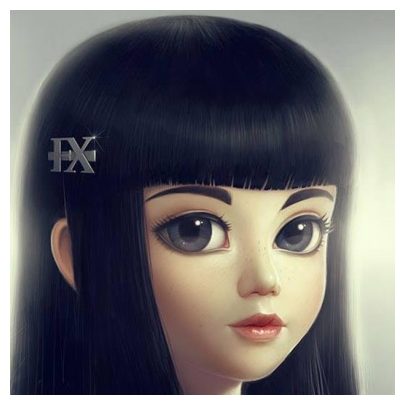

In [35]:
im = plt.imread(im_f[0])
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im)
ax.axis('off')
plt.show()

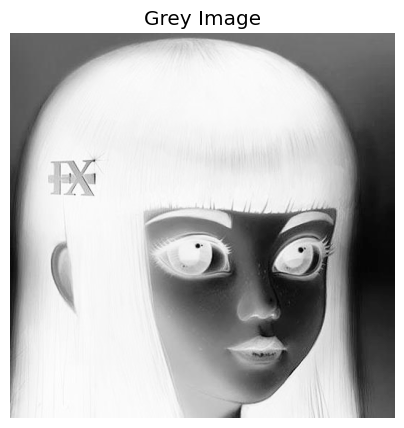

In [36]:
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

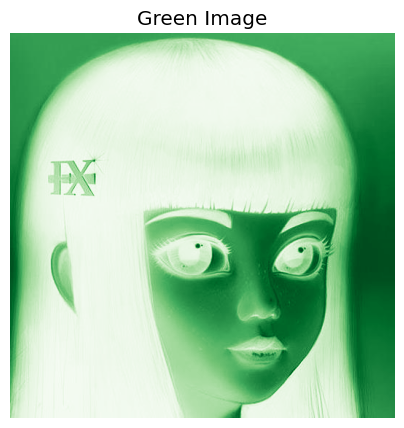

In [43]:
im_green = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im_gray, cmap='Greens')
ax.axis('off')
ax.set_title('Green Image')
plt.show()

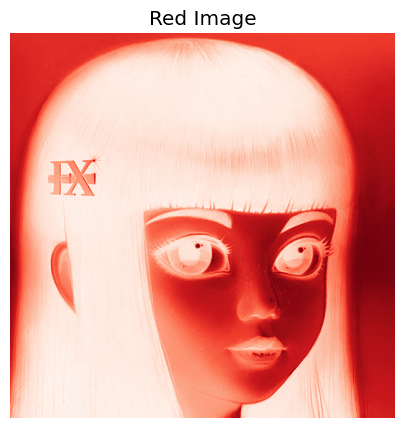

In [42]:
im_red = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im_gray, cmap='Reds')
ax.axis('off')
ax.set_title('Red Image')
plt.show()

# How to resize and scale the image

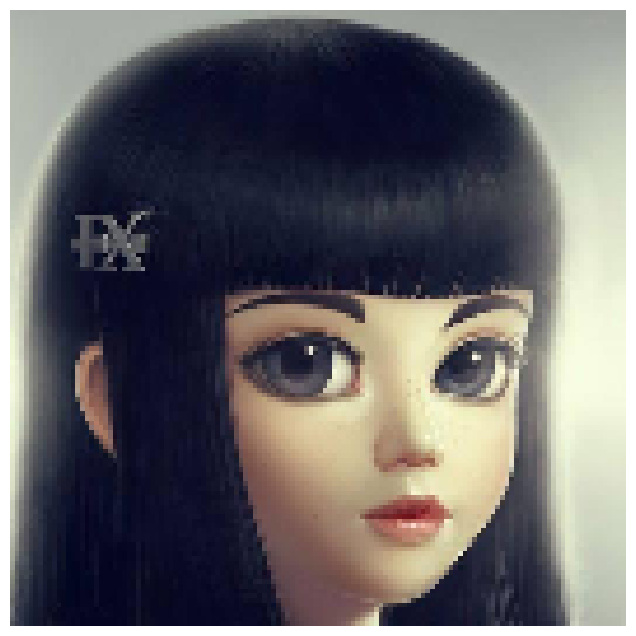

In [46]:
im_resized = cv2.resize(im, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(im_resized)
ax.axis('off')
plt.show()

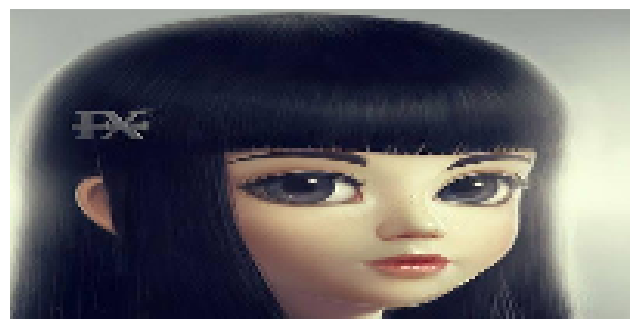

In [48]:
# resize again
im_resize = cv2.resize(im, (200, 100))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(im_resize)
ax.axis('off')
plt.show()

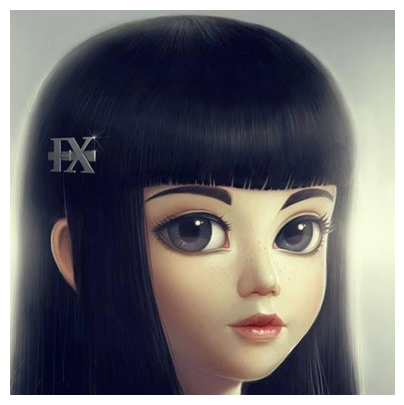

In [50]:
im_resize = cv2.resize(im, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im_resize)
ax.axis('off')
plt.show()

## Kernels

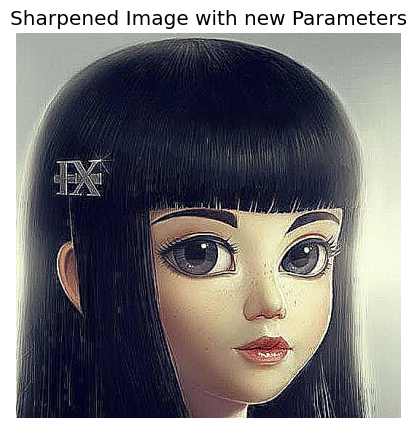

In [52]:
# Sharpen Image
ker_sharp = numpy.array([[-1,-1,-1],
                      [-1,9,-1],
                      [-1,-1,-1]])

sharp = cv2.filter2D(im, -1, ker_sharp)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(sharp)
ax.axis('off')
ax.set_title('Sharpened Image with new Parameters')
plt.show()

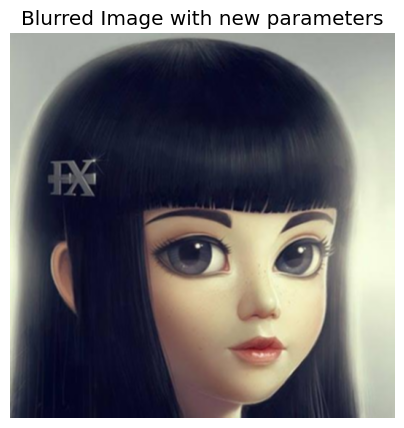

In [55]:
# Blurring the image
ker_blur = numpy.ones((3, 3), numpy.float32) / 9
blur = cv2.filter2D(im, -1, ker_blur)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(blur)
ax.axis('off')
ax.set_title('Blurred Image with new parameters')
plt.show()

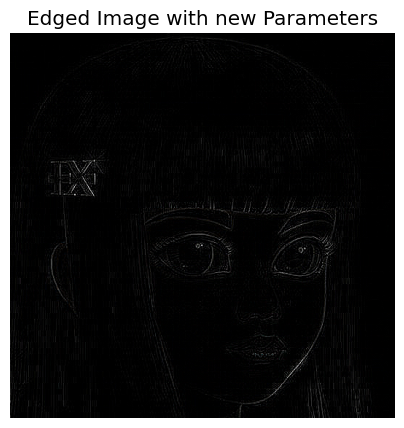

In [56]:
# Edged Image
ker_edg = numpy.array([[0,-1,0],
                      [-1,4,-1],
                      [0,-1,0]])

edg = cv2.filter2D(im, -1, ker_edg)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(edg)
ax.axis('off')
ax.set_title('Edged Image with new Parameters')
plt.show()

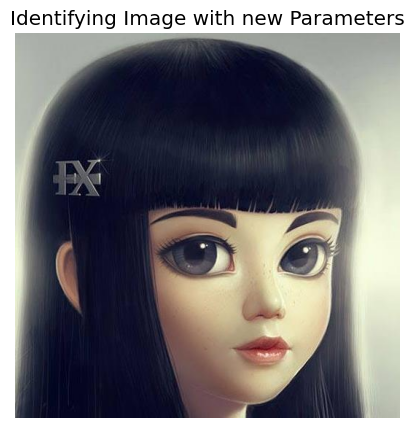

In [57]:
# Identifying Image
ker_idn = numpy.array([[0,0,0],
                      [0,1,0],
                      [0,0,0]])

idn = cv2.filter2D(im, -1, ker_idn)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(idn)
ax.axis('off')
ax.set_title('Identifying Image with new Parameters')
plt.show()

## Saving the final work

In [58]:
plt.imsave('/kaggle/working/mp.png', blur)
cv2.imwrite('/kaggle/working/cv2.png', blur)

True